In [1]:
# DESC:         Analysis of Calls for Service (911 calls) for the first half of 2017 and 2018
#                    in city of Los Angeles, source: Open Data 
# CAUTION:  Data cleansing and preparation automated for input 2017 and 2018 csv files 
#                    completed in other scripts
# AUTHOR:   Patty Jula
# DATE:        2018

In [2]:
%matplotlib notebook

In [9]:
# import dependencies
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# set variables
file_2017 = 'CFS_2017_month_data.csv'
file_2018 = 'CFS_2018_month_data.csv'
df2017 = pd.read_csv(file_2017)
df2018 = pd.read_csv(file_2018)
df2017.head()

,month,count,year,0
0,1,66532,2017,NaN
1,2,62828,2017,NaN
2,3,75136,2017,NaN
3,4,71456,2017,NaN
4,5,77993,2017,NaN


In [11]:
combined = df2017.append(df2018)
print(combined.head())

   month  count  year   0
0      1  66532  2017 NaN
1      2  62828  2017 NaN
2      3  75136  2017 NaN
3      4  71456  2017 NaN
4      5  77993  2017 NaN


In [12]:
# remove extra column '0'
combined.drop(columns=['0'])

,month,count,year
0,1,66532,2017
1,2,62828,2017
2,3,75136,2017
3,4,71456,2017
4,5,77993,2017
5,6,81401,2017
0,1,74811,2018
1,2,68946,2018
2,3,76851,2018
3,4,76244,2018


In [13]:
# call csv for use in graph
combined.to_csv('CFS_combined.csv',header=True)
# Read in data file
combined=pd.read_csv('CFS_combined.csv')

<IPython.core.display.Javascript object>


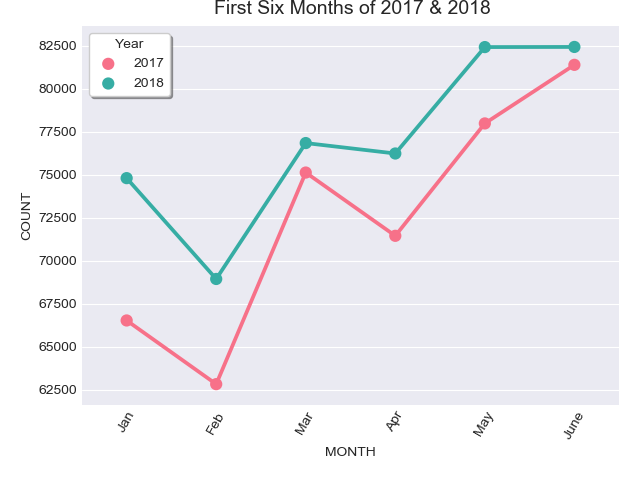

In [16]:
# utilize seaborn darkgrid
sns.set_style("darkgrid")

# Define x and y axis for pointplot
X='month'
Y='count'

# Sns input
sns.pointplot(X,Y,hue="year",data=combined,palette="husl")
# Rotate x labels
plt.xticks(rotation=60)
# N is count of x values
N = 6
# the x locations for the groups
ind = np.arange(N) 
# Set x tick labels, preferable than displaying months as numbers
plt.xticks(ind, ('Jan','Feb','Mar','Apr','May','June'))

# create legend, specify layout
lgnd=plt.legend(loc="best", title="Year", 
                  labelspacing=0.5,shadow=True,frameon=True)

# Incorporate a text label regarding CFS exclusions
plt.ylabel('COUNT')
plt.xlabel('MONTH')
# Incorporate a text label regarding CFS exclusions
plt.text(-0.5,55000, "LOCATION: CITY OF LOS ANGELES\nNOTE: Chart excludes 902 and CODE 6 records.",fontsize=9)
# Set border space
plt.gcf().subplots_adjust(bottom=.8)
plt.tight_layout(pad=1.5, w_pad=8, h_pad=4.0)

# Set legend info
frame = lgnd.get_frame()
frame.set_facecolor('#ffffff')
      
# specify title, subtitle and position
plt.title('Calls for Service by Dispatch Date',y=1.09,fontsize=18,weight=800)
plt.suptitle("First Six Months of 2017 & 2018", x=.55, y=1, fontsize=14)
fname='CFS_monthly.png'

# Create output png
plt.savefig(fname,dpi=300,edgecolor='k')

plt.show()